Back-Testing Start
Buy 37 rate:8.2067030232435
Buy 38 rate:11.379173466237376
Sell 54 rate:20.1150439354907
Sell 58 rate:16.952444860407212
Buy 134 rate:9.514664035450933
Buy 142 rate:8.70758351364188
Buy 165 rate:10.812521427252829
Sell 169 rate:23.227373107277028
Sell 170 rate:27.99147932327518
Sell 171 rate:20.604577033821446
Sell 172 rate:22.19775379872275
Sell 173 rate:22.20596917599993
Sell 174 rate:16.39459859676339
Sell 175 rate:43.927352274431286
Buy 190 rate:8.729004099986774

수익률: -0.28933685161826433



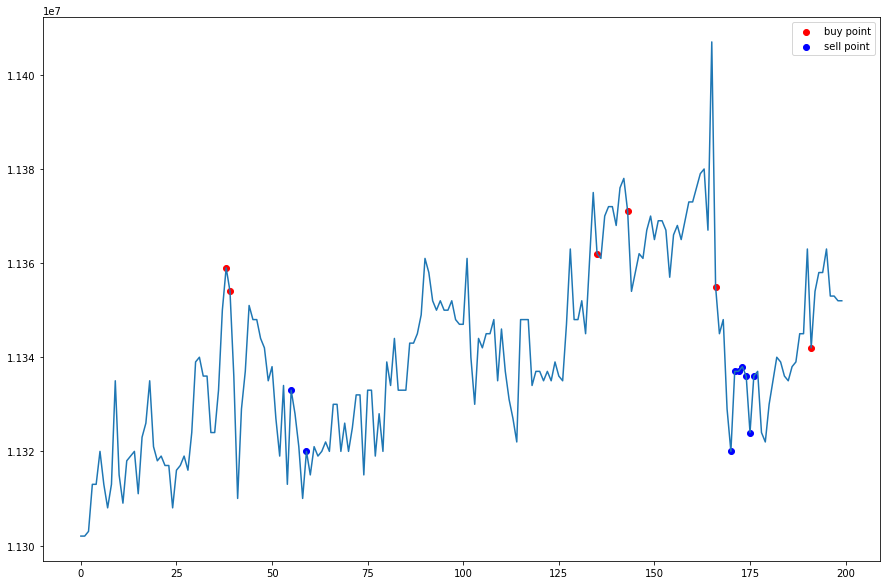

-0.28933685161826433

In [2]:
import pyupbit
import backtesting
import pandas as pd

df = pyupbit.get_ohlcv("KRW-BTC", interval="minute1")
df = pd.DataFrame(df)

def bothFilter(data):
    return data['close'].rolling(window=10).mean()

def buyfunc(data, index):
    rate = (data[index] - data[index-1])/data[index]
    ret = rate * 30000
    if ret>100:
        return 100
    elif ret<8:
        return 0
    return ret

def sellfunc(data, index):
    rate = (data[index] - data[index-1])/data[index]
    ret = rate * -1 * 60000
    if ret>100:
        return 100
    elif ret<16:
        return 0
    return ret

backtesting.SIMULATION(df, bothFilter,bothFilter, buyfunc, sellfunc)